# Lab Session 07

## Q1.

Implement all the discussed examples. Attach the code and outputs below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Q2.

Create a multilabel array containing three target labels for each digit image of MNIST dataset: the
first indicates whether or not the digit is small (<5), the second indicates whether or not it is even,
and the third indicates whether or not it is prime. Train a KNeighborsClassifier using the multiple
targets array. Analyze the accuracy and F1 score on all instances of test dataset.

## The MNIST Dataset

- MNIST stands for Modified National Institute of Standards and Technology.
- MNIST is a subset of a larger set available from NIST
- Original source: http://yann.lecun.com/exdb/mnist/
- This original dataset is also available at https://openml.org/ as MNIST_784.
- 784 = 28 x 28, means that the size of digit images is 28 x 28.
- OpenML is an open platform for sharing datasets, algorithms, and experiments.


- MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. 
- Each image is labeled with the digit it represents. 


- Dataset size: 70,000 examples, divided into train and test sets
- Train set size: 60,000 examples
- Test set size: 10,000 examples


- Downloaded as four files: training set images, training set labels, test set images, test set labels

## Loading Dataset

In [ ]:
#from sklearn.datasets import fetch_openml 
#mnist = fetch_openml('mnist_784', version=1)
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data() #automatically divides in train and test sets

In [4]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_X.shape

(60000, 28, 28)

In [7]:
train_y.shape

(60000,)

In [8]:
test_X.shape

(10000, 28, 28)

In [9]:
test_y.shape

(10000,)

## Reshaping train and test sets into 2D arrays

In [5]:
# Reshaping 3D dataset into 2D
train_X2=train_X.reshape(60000,784)
test_X2=test_X.reshape(10000,784)

In [6]:
train_X2.shape

(60000, 784)

In [8]:
train_X2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
test_X2.shape

(10000, 784)

## Displaying an image

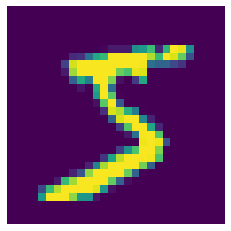

In [9]:
some_digit = train_X[0]
plt.imshow(some_digit.reshape(28, 28))
#plt.imshow(some_digit.reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

In [10]:
# Displaying corresponding output
train_y[0]

5

## Model 1: Running KNN on multiclass output

In [15]:
%%time
# Running KNN
m1 = KNeighborsClassifier().fit(train_X2,train_y)

Wall time: 4.98 ms


In [16]:
# Making predictions on test set
m1_pred = m1.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(test_y,m1_pred)*100)+"%")
m1_cmatrix=confusion_matrix(test_y, m1_pred)
print(m1_cmatrix)

The accuracy is 96.88%
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [17]:
# Making prediction on a single image
predicted=m1.predict(test_X2[0].reshape(-1, 784))
predicted

array([7], dtype=uint8)

In [18]:
# Actual output
test_y[0]

7

## Model 2: Running logistic regression on multiclass output

In [25]:
%%time
# Running logistic regression
m2 = LogisticRegression(max_iter=10000).fit(train_X2, train_y)

Wall time: 35min 36s


C:\Users\maria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Making predictions on test set
m2_pred = m2.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(test_y,m2_pred)*100)+"%")
m2_cmatrix=confusion_matrix(test_y, m2_pred)
print(m2_cmatrix)

The accuracy is 92.07%
[[ 952    0    5    2    1    8    5    4    3    0]
 [   0 1111    8    3    0    1    3    2    7    0]
 [  13   15  909   19   10    5   11    7   39    4]
 [   4    1   22  919    2   20    1   12   22    7]
 [   3    4    8    5  908    1   10    6    7   30]
 [  11    3    3   35   10  772   15    6   32    5]
 [  10    5   11    3    6   16  906    0    1    0]
 [   2   10   24    6    7    2    0  943    5   29]
 [   8   15    4   21    6   26    8   10  862   14]
 [   6    7    2    9   19    8    1   22   10  925]]


## Creating two labels (outputs) on same data
- Label 1: For large numbers greater than 7
- Label 2: For odd numbers

In [19]:
# Creating two labels for train data
train_y_large = np.array(train_y >= 7)
train_y_odd = np.array(train_y % 2 == 1)

# Putting both train labels in a single DataFrame
multilabel_train_y = pd.DataFrame(data=train_y_large, columns=['large'])
multilabel_train_y['odd'] = train_y_odd
multilabel_train_y

,large,odd
0,False,True
1,False,False
2,False,False
3,False,True
4,True,True
...,...,...
59995,True,False
59996,False,True
59997,False,True
59998,False,False


In [20]:
#Creating two labels for test data
test_y_large = np.array(test_y >= 7)
test_y_odd = np.array(test_y % 2 == 1)

# Putting both test labels in a single DataFrame
multilabel_test_y = pd.DataFrame(data=test_y_large, columns=['large'])
multilabel_test_y['odd'] = test_y_odd
multilabel_test_y

,large,odd
0,True,True
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
9995,False,False
9996,False,True
9997,False,False
9998,False,True


## Model 3: Running K-Nearest Neighbours on multiclass output

In [27]:
%%time
#Running K-Nearest Neighbours on train data and testing on test data
m3 = KNeighborsClassifier().fit(train_X2, multilabel_train_y)
m3_pred = pd.DataFrame(m3.predict(test_X2),columns=['large','odd'])

Wall time: 19.9 s


In [28]:
#c_matrix for 'large'
m3_cmatrix_large=confusion_matrix(multilabel_test_y['large'], m3_pred['large'])
print(m3_cmatrix_large)

[[6917   72]
 [ 106 2905]]


In [29]:
#c_matrix for 'odd'
m3_cmatrix_odd=confusion_matrix(multilabel_test_y['odd'], m3_pred['odd'])
print(m3_cmatrix_odd)

[[4825  101]
 [  47 5027]]


## Model 4: Running Logistic Regression on multiclass output
- Unlike K-Nearest Neighbours, logistic regression doesnot support multioutput classification directly.
- We will have to run it separately on each output.

In [30]:
# Creating logistic regression object
m4 = LogisticRegression(random_state=0, max_iter=10000)

In [31]:
%%time
# Running and testing on output 'large'
m4_large=m4.fit(train_X2, multilabel_train_y['large'])
m4_large_pred = m4_large.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y['large'],m4_large_pred)*100)+"%")
m4_large_cmatrix=confusion_matrix(multilabel_test_y['large'],m4_large_pred)
print(m4_large_cmatrix)

The accuracy is 91.77%
[[6638  351]
 [ 472 2539]]
Wall time: 8min 17s


In [32]:
%%time
# Running and testing on output 'odd'
m4_odd=m4.fit(train_X2, multilabel_train_y['odd'])
m4_odd_pred = m4_odd.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y['odd'],m4_odd_pred)*100)+"%")
m4_odd_cmatrix=confusion_matrix(multilabel_test_y['odd'],m4_odd_pred)
print(m4_odd_cmatrix)

The accuracy is 90.16%
[[4440  486]
 [ 498 4576]]
Wall time: 7min 10s
